<a href="https://colab.research.google.com/github/Drowsranger/Drowsranger/blob/main/dataANZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 7.7 MB/s 
     |████████████████████████████████| 16.7 MB 485 kB/s 
     |████████████████████████████████| 6.3 MB 23.9 MB/s 


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_excel("/content/drive/My Drive/ANZ synthesised transaction dataset.xlsx")

In [6]:
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [7]:
data["account"].nunique()

100

In [8]:
data["date"].value_counts()

2018-09-28    174
2018-08-17    172
2018-10-05    168
2018-10-17    162
2018-09-14    161
             ... 
2018-08-06     99
2018-08-20     97
2018-10-23     96
2018-10-08     95
2018-10-30     89
Name: date, Length: 91, dtype: int64

In [9]:
data["customer_id"].value_counts()

CUS-2487424745    578
CUS-2142601169    303
CUS-3026014945    292
CUS-3378712515    260
CUS-1614226872    259
                 ... 
CUS-3395687666     40
CUS-3201519139     37
CUS-1646183815     34
CUS-495599312      31
CUS-1739931018     25
Name: customer_id, Length: 100, dtype: int64

In [10]:
data.columns.values

array(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'], dtype=object)

In [11]:
date_group = data.groupby('date')["amount"].sum().reset_index()

In [12]:
date_group.head()

,date,amount
0,2018-08-01,29867.94
1,2018-08-02,21786.32
2,2018-08-03,38096.58
3,2018-08-04,6296.05
4,2018-08-05,4426.50


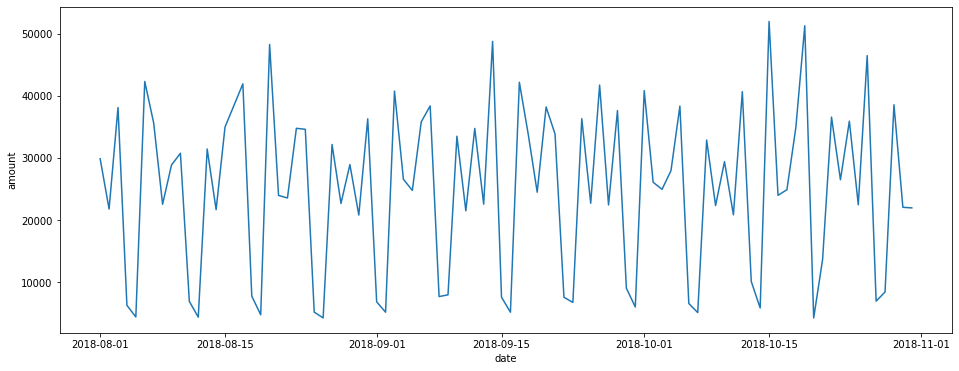

In [13]:
plt.figure(figsize=(16, 6))
sns.lineplot(y="amount",x="date",data=date_group)

In [14]:
# Mean transaction amount per day

In [15]:
date_mean = data.groupby("date")["amount"].mean().reset_index()

In [16]:
date_mean.head()

,date,amount
0,2018-08-01,218.014161
1,2018-08-02,143.331053
2,2018-08-03,242.653376
3,2018-08-04,53.356356
4,2018-08-05,44.265000


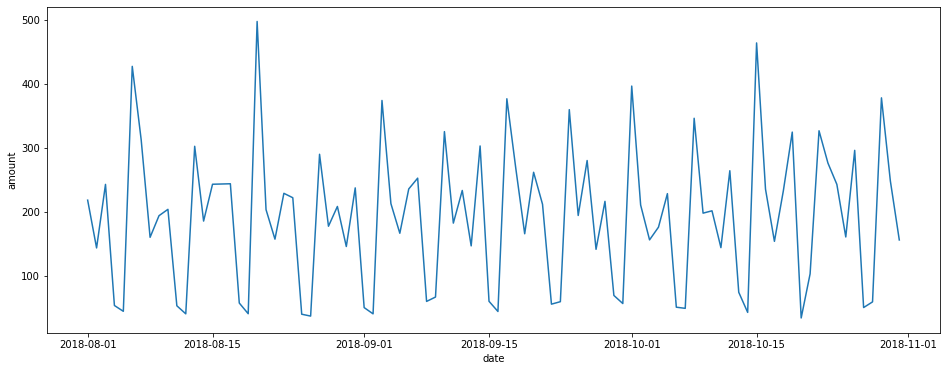

In [17]:
plt.figure(figsize=(16, 6))
sns.lineplot(y="amount",x="date",data=date_mean)

In [18]:
#Transaction volume by gender

In [19]:
gender_vol = data[["date","amount","gender"]]
gender_vol.head()

,date,amount,gender
0,2018-08-01,16.25,F
1,2018-08-01,14.19,F
2,2018-08-01,6.42,M
3,2018-08-01,40.90,F
4,2018-08-01,3.25,F


In [20]:
gender_data = gender_vol.groupby(['date',"gender"])["amount"].sum().reset_index()
gender_data

,date,gender,amount
0,2018-08-01,F,13628.64
1,2018-08-01,M,16239.30
2,2018-08-02,F,5896.25
3,2018-08-02,M,15890.07
4,2018-08-03,F,17091.59
...,...,...,...
177,2018-10-29,M,22119.89
178,2018-10-30,F,11051.25
179,2018-10-30,M,11011.09
180,2018-10-31,F,13704.25


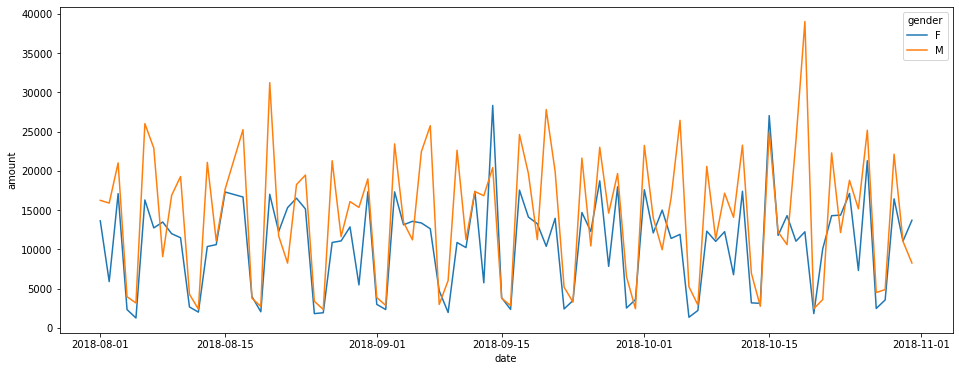

In [21]:
plt.figure(figsize=(16, 6))
sns.lineplot(y="amount",x="date",hue="gender",data=gender_data)

In [22]:
# Mean transaction by gender

In [23]:
gender_mean = data.groupby(["date","gender"])["amount"].mean().reset_index()
gender_mean.head()

,date,gender,amount
0,2018-08-01,F,191.952676
1,2018-08-01,M,246.050000
2,2018-08-02,F,85.452899
3,2018-08-02,M,191.446627
4,2018-08-03,F,216.349241


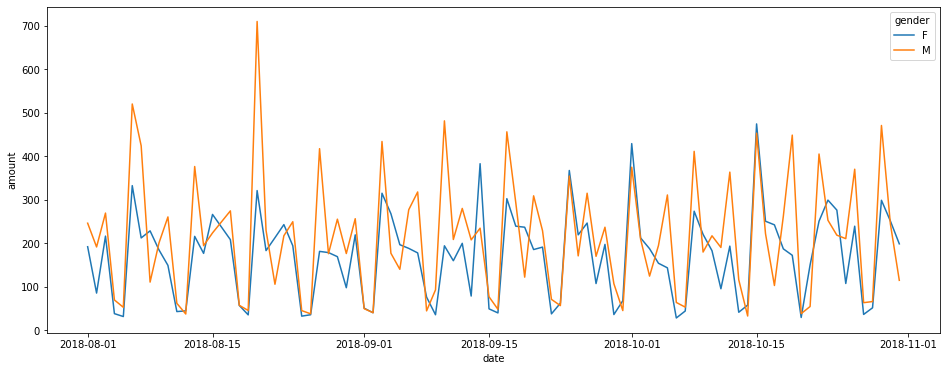

In [24]:
plt.figure(figsize=(16, 6))
sns.lineplot(y="amount",x="date",hue="gender", data=gender_mean)

In [25]:
# Transaction volume by merchant state

In [26]:
merchant_state = data.groupby(["date","merchant_state"])["amount"].sum().reset_index()
merchant_state.head()

,date,merchant_state,amount
0,2018-08-01,NSW,828.36
1,2018-08-01,NT,73.25
2,2018-08-01,QLD,921.76
3,2018-08-01,SA,62.37
4,2018-08-01,TAS,17.13


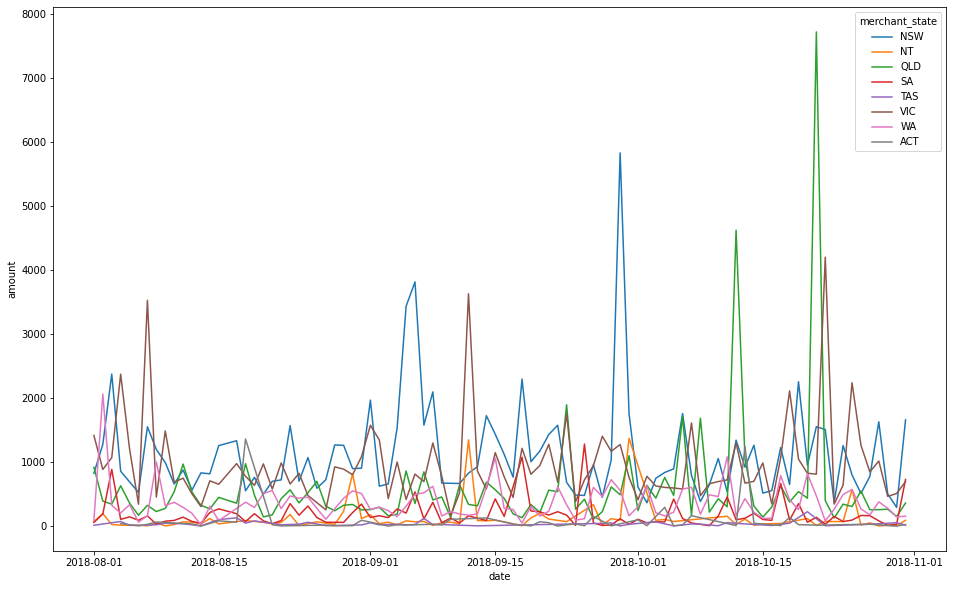

In [27]:
plt.figure(figsize=(16, 10))
sns.lineplot(y="amount",x="date",hue="merchant_state", data=merchant_state)

In [28]:
# Transaction volume by merchant state (barplot)

In [29]:
merchant_state_total = data.groupby(["merchant_state","gender"])["amount"].sum().reset_index()
merchant_state_total

,merchant_state,gender,amount
0,ACT,F,1657.44
1,ACT,M,3219.24
2,NSW,F,41430.88
3,NSW,M,60590.89
4,NT,F,8741.42
5,NT,M,427.47
6,QLD,F,28611.05
7,QLD,M,24872.40
8,SA,F,11349.73
9,SA,M,5426.84


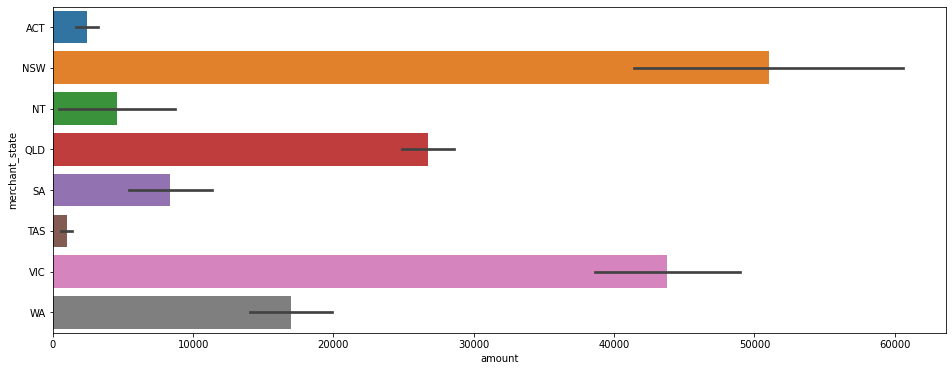

In [30]:
plt.figure(figsize=(16, 6))
sns.barplot(x="amount", y="merchant_state",  data=merchant_state_total)

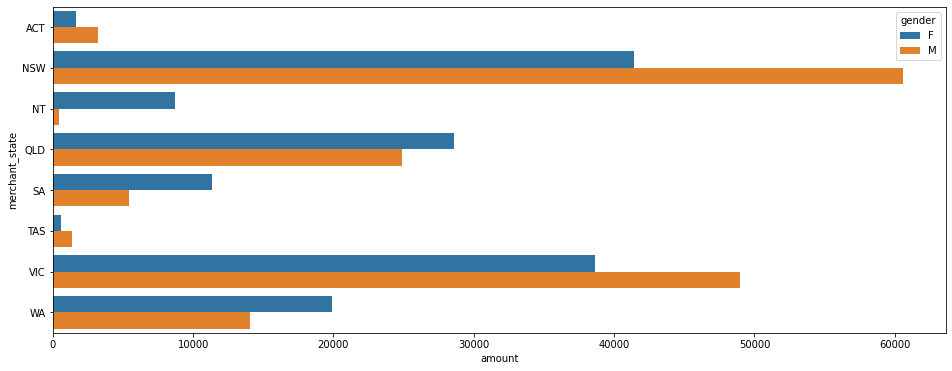

In [31]:
plt.figure(figsize=(16, 6))
sns.barplot(x="amount", y="merchant_state", hue="gender", data=merchant_state_total)

In [32]:
# Mean transaction volume by merchant state

In [33]:
merchant_state_mean = data.groupby(["date","merchant_state"])["amount"].mean().reset_index()
merchant_state_mean.head()

,date,merchant_state,amount
0,2018-08-01,NSW,29.584286
1,2018-08-01,NT,24.416667
2,2018-08-01,QLD,54.221176
3,2018-08-01,SA,15.592500
4,2018-08-01,TAS,17.130000


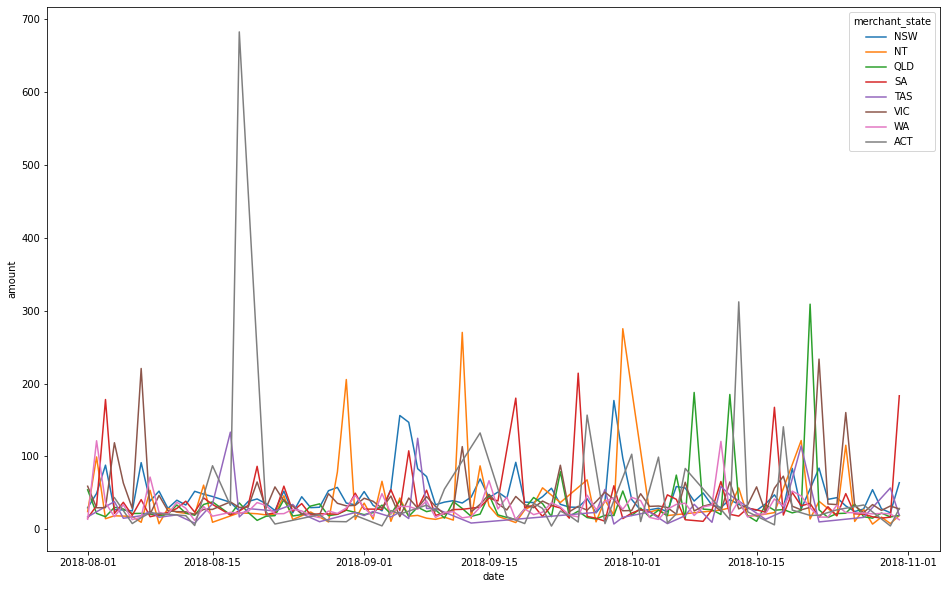

In [34]:
plt.figure(figsize=(16, 10))
sns.lineplot(y="amount",x="date",hue="merchant_state", data=merchant_state_mean)

In [35]:
# Transaction volume by merchant suburb (sum)

In [36]:
merchant_suburb= data.groupby(["merchant_suburb"])["amount"].sum().reset_index()
merchant_suburb

,merchant_suburb,amount
0,Abbotsford,2004.29
1,Aberdeen,52.45
2,Aberfeldie,57.77
3,Aberfoyle Park,84.92
4,Acacia Ridge,10.30
...,...,...
1604,Yulara,80.07
1605,Yungaburra,105.38
1606,Zetland,78.47
1607,Zillmere,38.63


In [37]:
suburb_sorted=merchant_suburb.sort_values(by='amount', ascending=False)
print("Top 10 regions with most value of transactions over 91 days are-")
print(suburb_sorted.head(10).values)

Top 10 regions with most value of transactions over 91 days are-
[['Sydney' 21675.44]
 ['Melbourne' 11943.53]
 ['South Brisbane' 11740.58]
 ['Mascot' 10282.62]
 ['Mount Gambier' 4710.25]
 ['Malvern' 3994.8300000000004]
 ['Maribyrnong' 3770.83]
 ['Parap' 3323.5099999999998]
 ['Brisbane City' 2724.45]
 ['Mount Gravatt' 2721.14]]


In [38]:
tuple_suburb_sum = [tuple(x) for x in merchant_suburb.values]

(-0.5, 1399.5, 1199.5, -0.5)

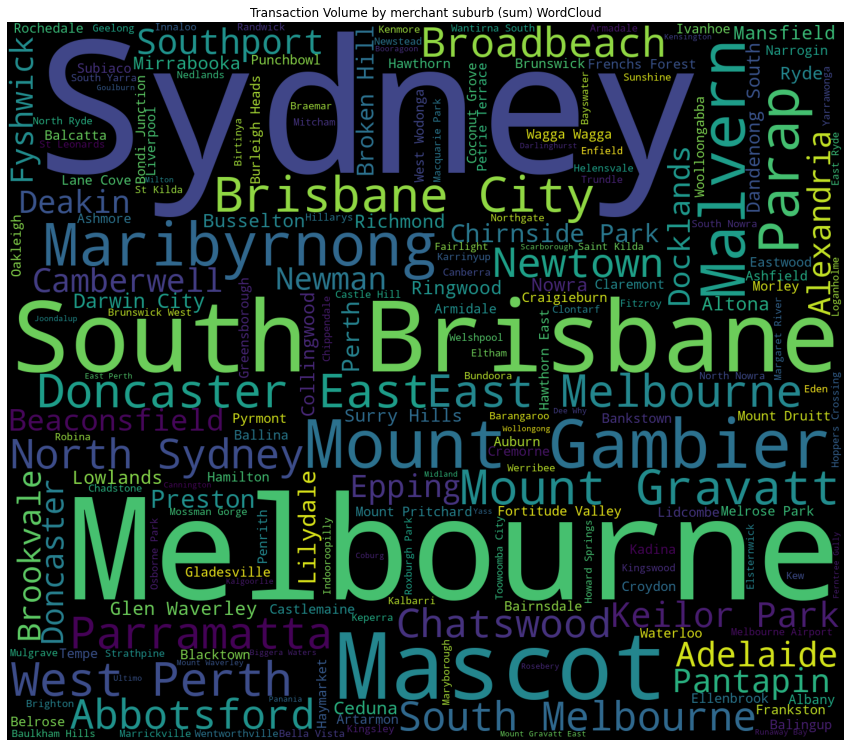

In [39]:
plt.subplots(figsize=(15,15))
wordcloud = WordCloud(width=1400,height=1200).generate_from_frequencies(dict(tuple_suburb_sum))
plt.title('Transaction Volume by merchant suburb (sum) WordCloud')

plt.imshow(wordcloud)
plt.axis("off")


In [40]:
# Transaction volume by merchant suburb (mean)

In [41]:
merchant_suburb_mean= data.groupby(["merchant_suburb"])["amount"].mean().reset_index()
merchant_suburb_mean.head(5)

,merchant_suburb,amount
0,Abbotsford,400.858
1,Aberdeen,26.225
2,Aberfeldie,57.770
3,Aberfoyle Park,42.460
4,Acacia Ridge,10.300


In [42]:
suburb_sorted_mean=merchant_suburb_mean.sort_values(by='amount', ascending=False)

In [43]:
print("Top 10 regions with most mean value of transactions over 91 days are-")
print(suburb_sorted_mean.head(10).values)

Top 10 regions with most mean value of transactions over 91 days are-
[['Pantapin' 829.7650000000001]
 ['Gladesville' 734.1]
 ['West Wodonga' 559.33]
 ['South Brisbane' 559.0752380952381]
 ['Parap' 553.9183333333333]
 ['Lowlands' 524.58]
 ['Mossman Gorge' 501.67]
 ['Fairlight' 496.76]
 ['Deakin' 491.50666666666666]
 ['Mount Gravatt' 453.5233333333333]]


In [44]:
tuple_suburb_mean = [tuple(x) for x in merchant_suburb_mean.values]

(-0.5, 1399.5, 1199.5, -0.5)

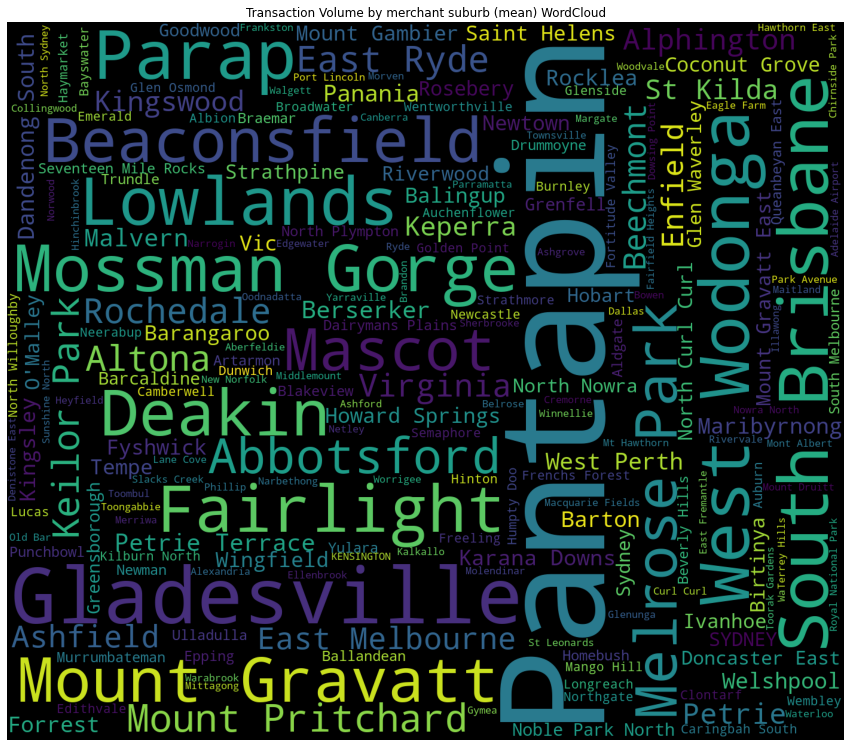

In [45]:
plt.subplots(figsize=(15,15))
wordcloud2 = WordCloud(width=1400,height=1200).generate_from_frequencies(dict(tuple_suburb_mean))
plt.title('Transaction Volume by merchant suburb (mean) WordCloud')

plt.imshow(wordcloud2)
plt.axis("off")

In [46]:
# Account balance (total/bank assets) over dates.

In [47]:
acc_bal_total= data.groupby(["date",'gender'])["balance"].sum().reset_index()
acc_bal_total.head(5)

,date,gender,balance
0,2018-08-01,F,619748.69
1,2018-08-01,M,741205.93
2,2018-08-02,F,707846.59
3,2018-08-02,M,1414623.33
4,2018-08-03,F,296789.02


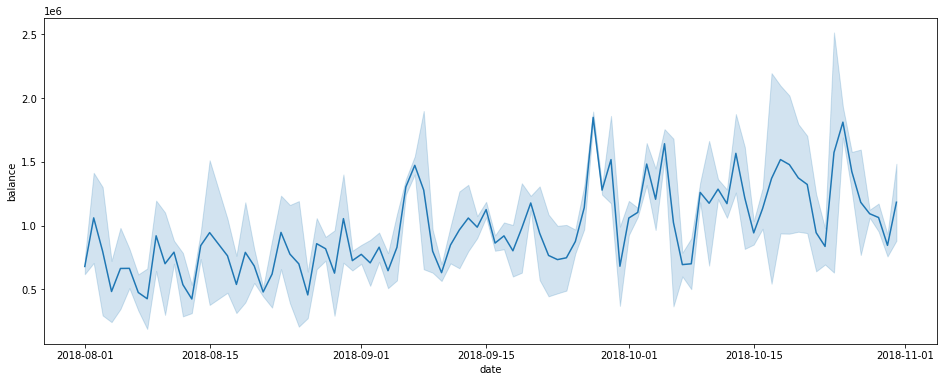

In [48]:
plt.figure(figsize=(16, 6))
sns.lineplot(y="balance",x="date",data=acc_bal_total)

In [49]:
# Account balance (mean) over dates.

In [50]:
acc_bal_mean= data.groupby(["date",'gender'])["balance"].mean().reset_index()
acc_bal_mean.head(5)

,date,gender,balance
0,2018-08-01,F,8728.854789
1,2018-08-01,M,11230.392879
2,2018-08-02,F,10258.646232
3,2018-08-02,M,17043.654578
4,2018-08-03,F,3756.823038


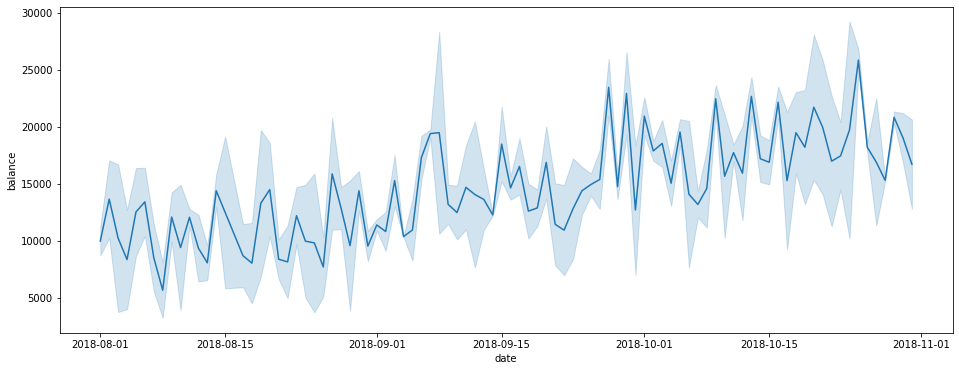

In [51]:
plt.figure(figsize=(16, 6))
sns.lineplot(y="balance",x="date",data=acc_bal_mean)

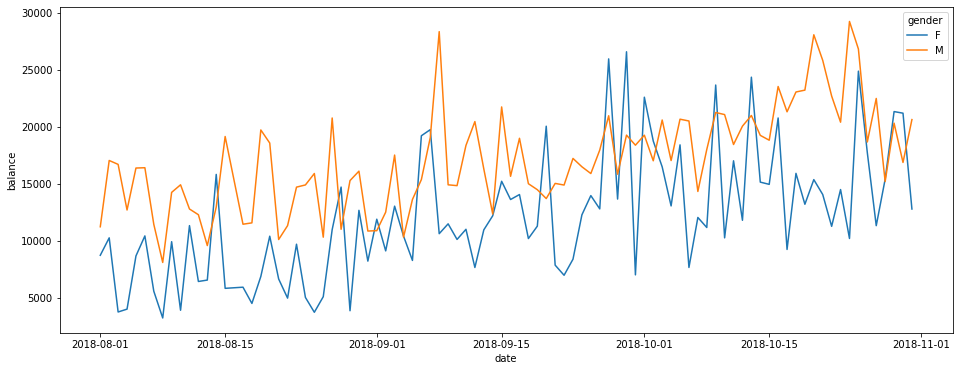

In [52]:
plt.figure(figsize=(16, 6))
sns.lineplot(y="balance",x="date",hue="gender",data=acc_bal_mean)

In [53]:
# Account balance (mean) for various states over dates

In [54]:
acc_bal_state_mean= data.groupby(["date",'merchant_state'])["balance"].mean().reset_index()
acc_bal_state_mean.head(5)

,date,merchant_state,balance
0,2018-08-01,NSW,3570.146429
1,2018-08-01,NT,366.056667
2,2018-08-01,QLD,5459.165294
3,2018-08-01,SA,5728.495000
4,2018-08-01,TAS,6924.650000


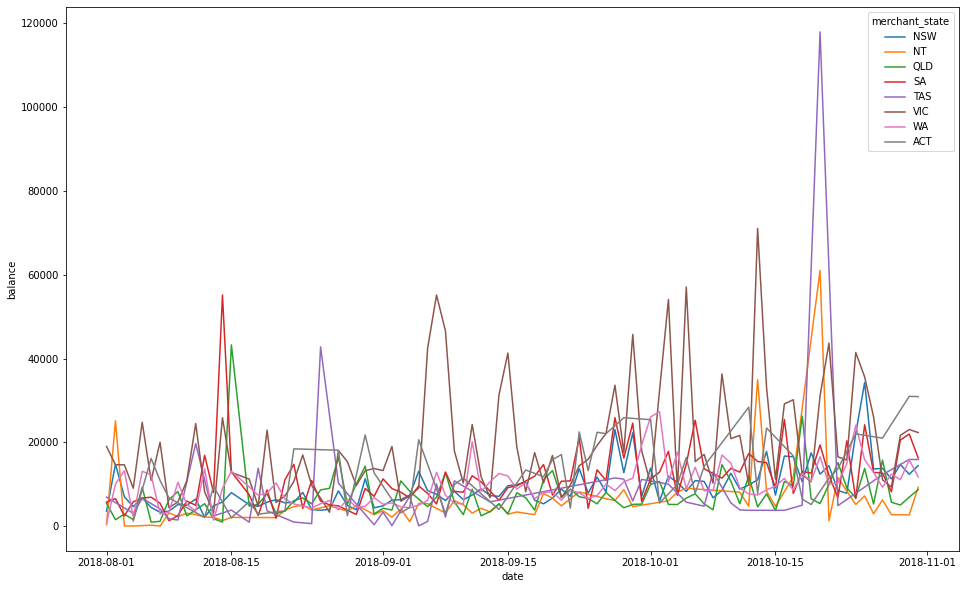

In [55]:
plt.figure(figsize=(16, 10))
sns.lineplot(y="balance",x="date",hue="merchant_state",data=acc_bal_state_mean)

In [56]:
# Account balance (mean) for various states (days average)

In [57]:
acc_bal_state= data.groupby(['merchant_state',"gender"])["balance"].mean().reset_index()
acc_bal_state.head

<bound method NDFrame.head of    merchant_state gender       balance
0             ACT      F  14433.733913
1             ACT      M   9176.572593
2             NSW      F   8855.846765
3             NSW      M   9936.826013
4              NT      F   4730.673850
5              NT      M  38011.864000
6             QLD      F   2994.443750
7             QLD      M  11428.045648
8              SA      F  11307.189714
9              SA      M  10924.267706
10            TAS      F   2714.771875
11            TAS      M  14113.011731
12            VIC      F  22374.283856
13            VIC      M  17593.964666
14             WA      F   6261.642588
15             WA      M  14971.977517>

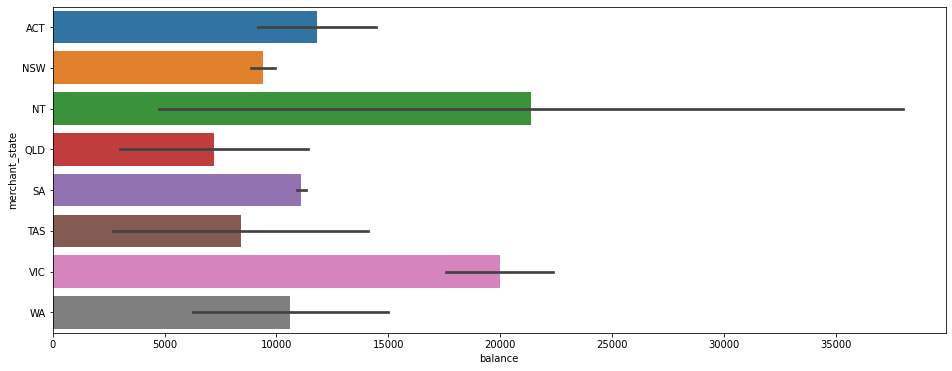

In [58]:
plt.figure(figsize=(16, 6))
sns.barplot(x="balance", y="merchant_state",  data=acc_bal_state)

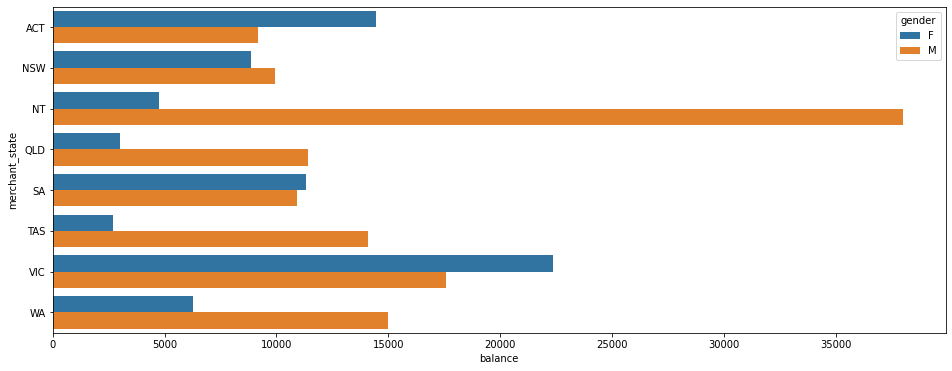

In [59]:
plt.figure(figsize=(16, 6))
sns.barplot(x="balance", y="merchant_state",hue="gender",  data=acc_bal_state)

In [60]:
# Total transaction by age

In [61]:
age_amount_sum= data.groupby(['age',"gender"])["amount"].sum().reset_index()
age_amount_sum.head()

,age,gender,amount
0,18,F,45124.14
1,18,M,34020.50
2,19,F,84318.80
3,19,M,61733.92
4,20,F,49579.79


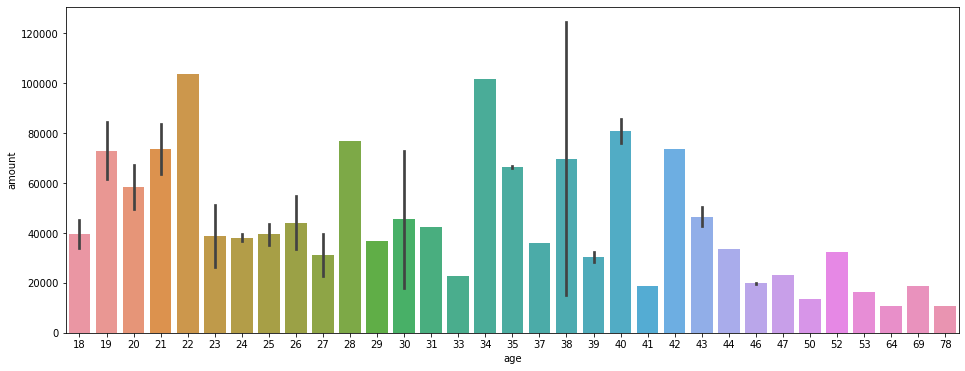

In [62]:
plt.figure(figsize=(16, 6))
sns.barplot(y="amount", x="age",  data=age_amount_sum)

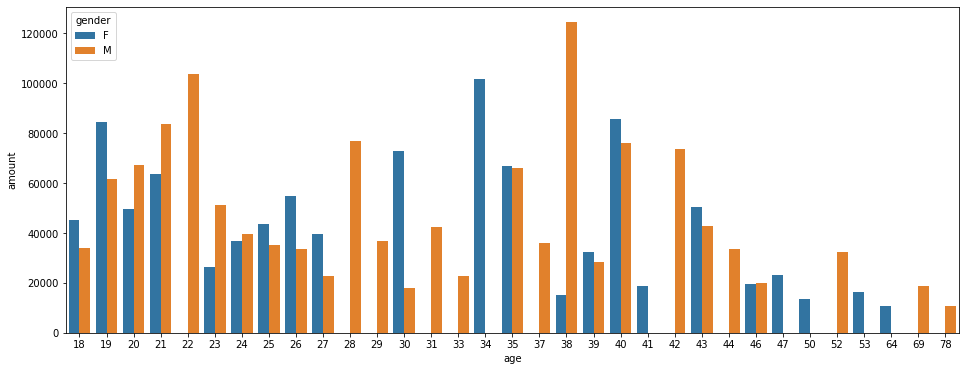

In [63]:
plt.figure(figsize=(16, 6))
sns.barplot(y="amount", x="age", hue="gender" ,data=age_amount_sum)

In [64]:
# Mean transaction by age

In [65]:
age_amount_mean= data.groupby(['age',"gender"])["amount"].mean().reset_index()
age_amount_mean.head()

,age,gender,amount
0,18,F,151.933131
1,18,M,234.624138
2,19,F,244.402319
3,19,M,177.396322
4,20,F,135.835041


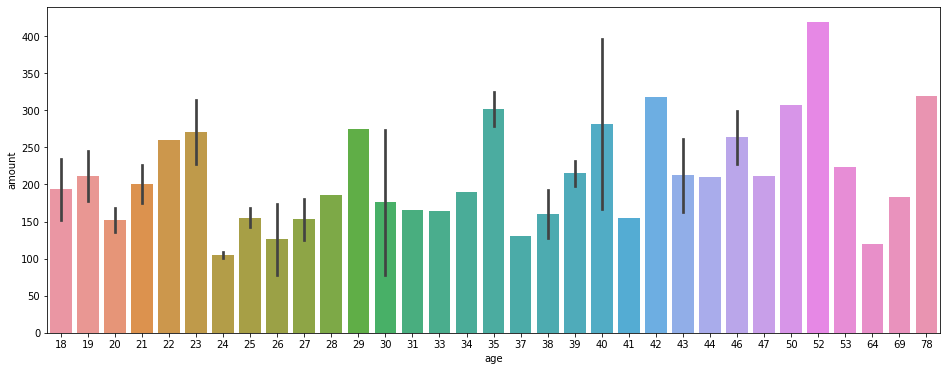

In [66]:
plt.figure(figsize=(16, 6))
sns.barplot(y="amount", x="age",  data=age_amount_mean)

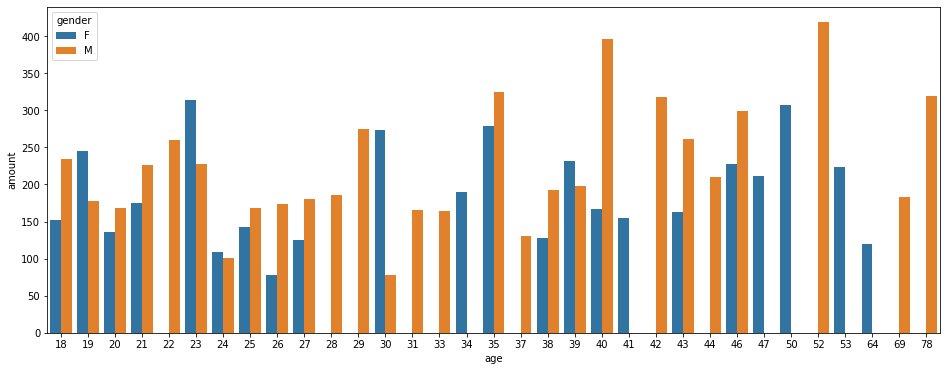

In [67]:
plt.figure(figsize=(16, 6))
sns.barplot(y="amount", x="age", hue="gender", data=age_amount_mean)

In [68]:
# Debit-Credit transaction mean by gender

In [69]:
debit_credit= data.groupby(["movement","gender"])["amount"].mean().reset_index()
debit_credit

,movement,gender,amount
0,credit,F,1679.370477
1,credit,M,2096.811681
2,debit,F,49.946881
3,debit,M,54.980407


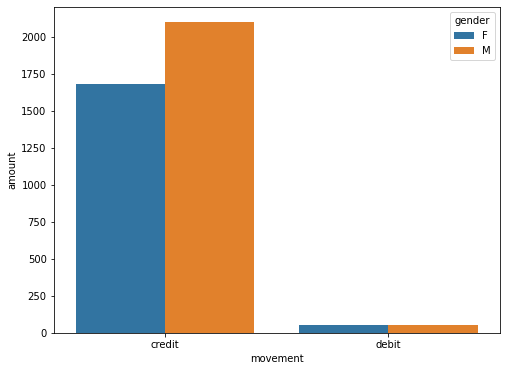

In [70]:
plt.figure(figsize=(8, 6))
sns.barplot(y="amount", x="movement", hue="gender", data=debit_credit)

In [71]:
# Debit-Credit transaction total by gender

In [72]:
debit_credit_total= data.groupby(["movement","gender"])["amount"].sum().reset_index()
debit_credit_total

,movement,gender,amount
0,credit,F,703656.23
1,credit,M,972920.62
2,debit,F,266666.40
3,debit,M,320040.95


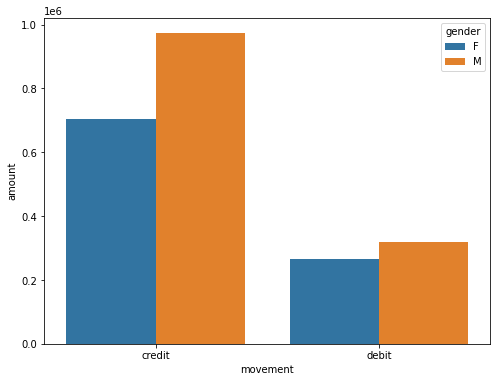

In [73]:
plt.figure(figsize=(8, 6))
sns.barplot(y="amount", x="movement", hue="gender", data=debit_credit_total)

In [74]:
# Debit-Credit transaction sum by age

In [75]:
dc_age_total= data.groupby(["movement","age"])["amount"].sum().reset_index()
dc_age_total.head()

,movement,age,amount
0,credit,18,59762.72
1,credit,19,115785.36
2,credit,20,84511.81
3,credit,21,107137.60
4,credit,22,81124.69


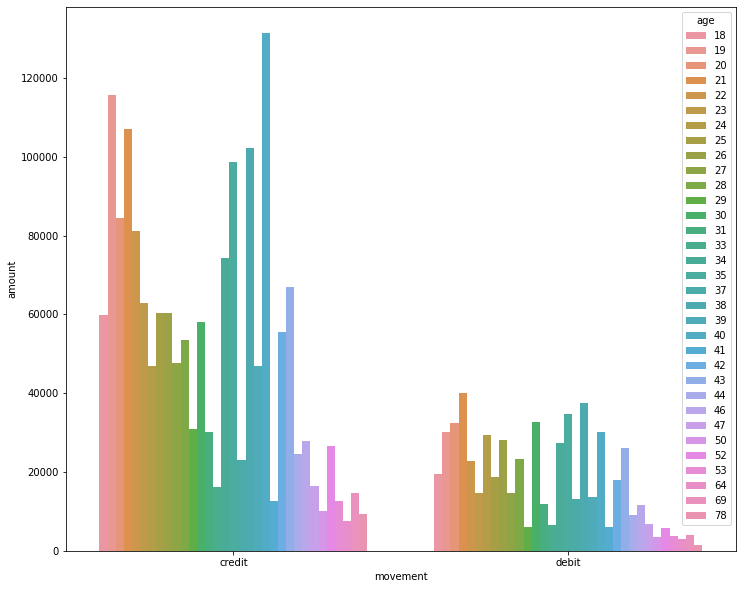

In [76]:
plt.figure(figsize=(12, 10))
sns.barplot(y="amount", x="movement", hue="age", data=dc_age_total)

In [77]:
# Debit-Credit transaction mean by age

In [78]:
dc_age_mean= data.groupby(["movement","age"])["amount"].mean().reset_index()
dc_age_mean.head()

,movement,age,amount
0,credit,18,1867.585000
1,credit,19,2517.073043
2,credit,20,1509.139464
3,credit,21,1984.029630
4,credit,22,2080.120256


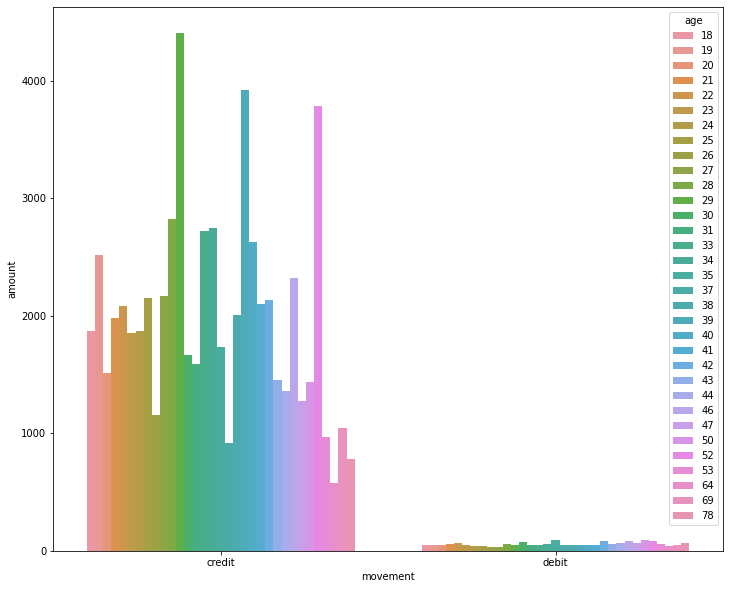

In [79]:
plt.figure(figsize=(12, 10))
sns.barplot(y="amount", x="movement", hue="age", data=dc_age_mean)

In [80]:
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [81]:
# Plotting world map cooridinates

In [82]:
df=data[["amount",'merchant_long_lat',"merchant_suburb","movement","gender"]]

In [83]:
df=df.dropna()

In [84]:
df = df.reindex(columns = df.columns.tolist() + ['long','lat'])

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7717 entries, 0 to 12042
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   amount             7717 non-null   float64
 1   merchant_long_lat  7717 non-null   object 
 2   merchant_suburb    7717 non-null   object 
 3   movement           7717 non-null   object 
 4   gender             7717 non-null   object 
 5   long               0 non-null      float64
 6   lat                0 non-null      float64
dtypes: float64(3), object(4)
memory usage: 482.3+ KB


In [86]:
longitude=[]
latitude=[]

for row in df['merchant_long_lat']:
    
    longitude.append(row.split(' ')[0])
    latitude.append(row.split(' ')[1])
    
df["long"]=longitude
df["lat"]=latitude

In [87]:
df.head()

,amount,merchant_long_lat,merchant_suburb,movement,gender,long,lat
0,16.25,153.38 -27.99,Ashmore,debit,F,153.38,-27.99
1,14.19,151.21 -33.87,Sydney,debit,F,151.21,-33.87
2,6.42,151.21 -33.87,Sydney,debit,M,151.21,-33.87
3,40.90,153.05 -26.68,Buderim,debit,F,153.05,-26.68
4,3.25,153.44 -28.06,Mermaid Beach,debit,F,153.44,-28.06


In [88]:
df[["long", "lat"]] = df[["long", "lat"]].apply(pd.to_numeric)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7717 entries, 0 to 12042
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   amount             7717 non-null   float64
 1   merchant_long_lat  7717 non-null   object 
 2   merchant_suburb    7717 non-null   object 
 3   movement           7717 non-null   object 
 4   gender             7717 non-null   object 
 5   long               7717 non-null   float64
 6   lat                7717 non-null   float64
dtypes: float64(3), object(4)
memory usage: 482.3+ KB


In [90]:
#The maximum ranges in longitude and latitude

ranges = ((df.long.min(),   df.long.max(),      
         df.lat.min(), df.lat.max()))
print(ranges)

(113.83, 153.61, -43.31, -12.33)


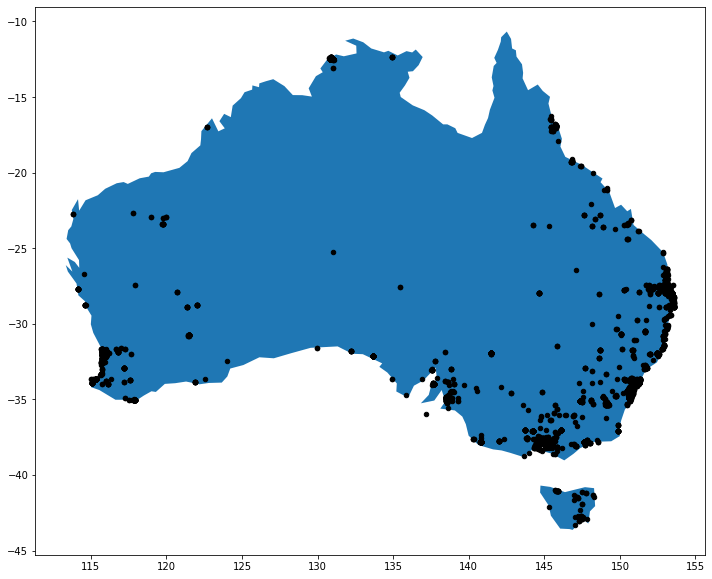

In [91]:
#Plotting the transactions over the map of australia

geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#selecting australia
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

aus =  world[world.name == "Australia"]

gdf.plot(ax=aus.plot(figsize=(12, 12)), marker='o', color='black', markersize=20)

In [92]:
gdf.head()

,amount,merchant_long_lat,merchant_suburb,movement,gender,long,lat,geometry
0,16.25,153.38 -27.99,Ashmore,debit,F,153.38,-27.99,POINT (153.38000 -27.99000)
1,14.19,151.21 -33.87,Sydney,debit,F,151.21,-33.87,POINT (151.21000 -33.87000)
2,6.42,151.21 -33.87,Sydney,debit,M,151.21,-33.87,POINT (151.21000 -33.87000)
3,40.90,153.05 -26.68,Buderim,debit,F,153.05,-26.68,POINT (153.05000 -26.68000)
4,3.25,153.44 -28.06,Mermaid Beach,debit,F,153.44,-28.06,POINT (153.44000 -28.06000)


In [93]:
# Implementing WordCloud

In [94]:
name_trans=data.groupby(["first_name"])["amount"].mean().reset_index()
name_trans

,first_name,amount
0,Abigail,291.293333
1,Alexander,304.375604
2,Amy,119.057581
3,Andrew,318.977941
4,Antonio,192.534870
...,...,...
75,Tim,515.583846
76,Timothy,175.425000
77,Tonya,99.569658
78,Tyler,192.216193


In [95]:
tuple_name = [tuple(x) for x in name_trans.values]

(-0.5, 1399.5, 1199.5, -0.5)

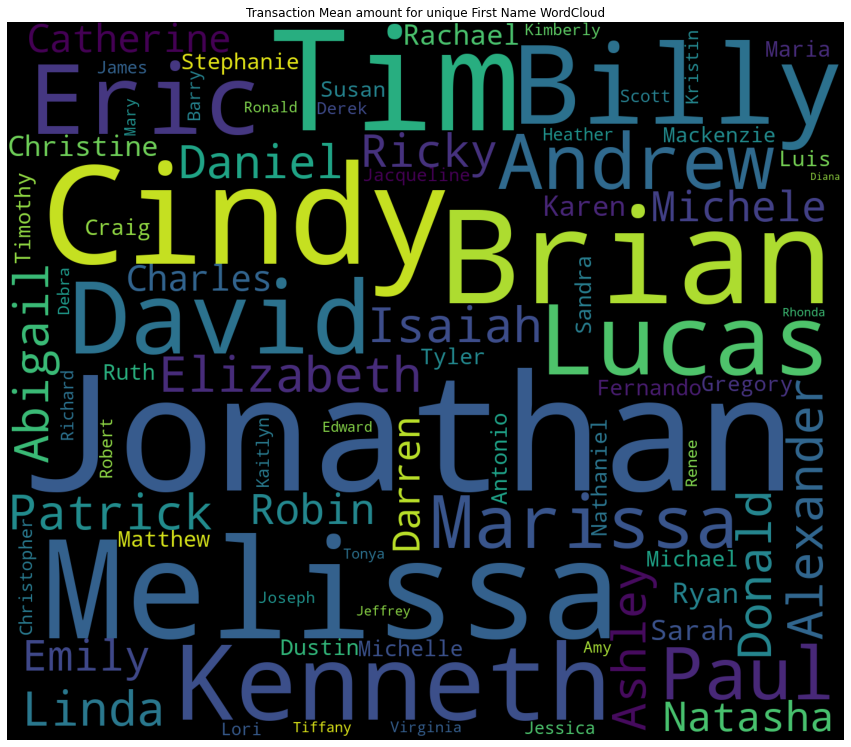

In [96]:
plt.subplots(figsize=(15,15))
wordcloud2 = WordCloud(width=1400,height=1200).generate_from_frequencies(dict(tuple_name))
plt.title('Transaction Mean amount for unique First Name WordCloud')

plt.imshow(wordcloud2)
plt.axis("off")

In [97]:
# Grouping by their mean balance and transaction amount

In [99]:
data_cust=data[["customer_id","first_name","age","balance",'amount']]

In [100]:
customer=data_cust.groupby(["customer_id","age","first_name"])["balance","amount"].mean().reset_index()

In [101]:
customer

,customer_id,age,first_name,balance,amount
0,CUS-1005756958,53,Stephanie,2275.852055,222.862603
1,CUS-1117979751,21,Lucas,9829.929000,339.843700
2,CUS-1140341822,28,Dustin,5699.212250,212.632500
3,CUS-1147642491,34,Robin,9032.841186,245.600169
4,CUS-1196156254,34,Jessica,22272.433755,147.145796
...,...,...,...,...,...
95,CUS-72755508,35,Kimberly,4497.557069,197.213276
96,CUS-809013380,21,Kaitlyn,3756.902903,151.694274
97,CUS-860700529,30,Jeffrey,3462.276009,77.681888
98,CUS-880898248,26,Robert,8528.830385,146.954487


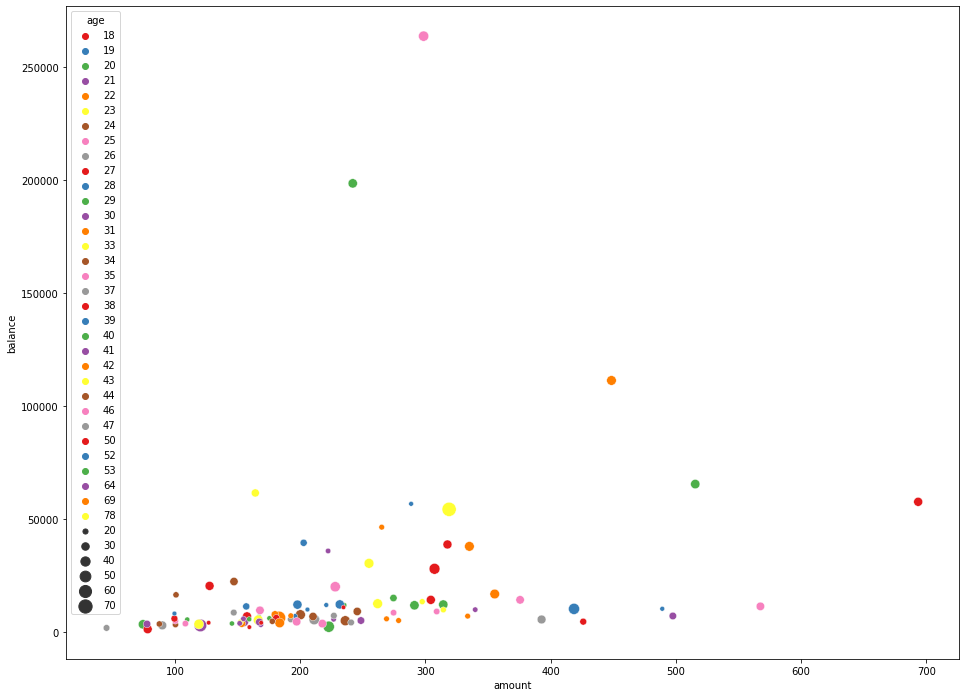

In [102]:
plt.figure(figsize=(16, 12))
sns.scatterplot(y="balance", x="amount",hue="age", palette="Set1", size="age",sizes=(20, 200), data=customer)

In [103]:
# 2D customer segmentation

In [104]:
#KMeans clustering

from sklearn.cluster import KMeans

In [105]:
X=customer[["balance","amount"]].values
X.shape

(100, 2)

In [106]:
wcss=[]

for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

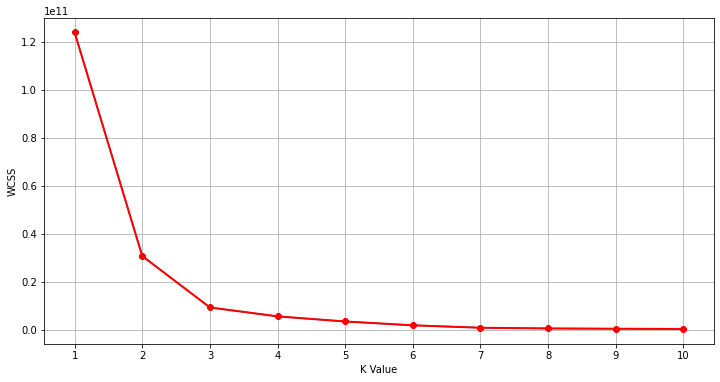

In [107]:
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [108]:
km1=KMeans(n_clusters=3)

In [109]:
km1.fit(X)

KMeans(n_clusters=3)

In [110]:
y=km1.predict(X)

In [111]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

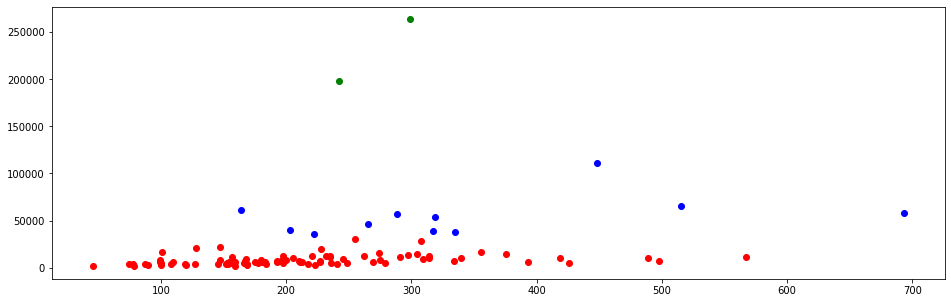

In [112]:
plt.figure(figsize=(16, 5))
plt.scatter(X[y==0,1],X[y==0,0],color='red')
plt.scatter(X[y==1,1],X[y==1,0],color='green')
plt.scatter(X[y==2,1],X[y==2,0],color='blue')

In [113]:
# 3D customer segmentation

In [114]:
from mpl_toolkits.mplot3d import Axes3D

In [115]:
X=customer[["balance","amount","age"]].values
X.shape

(100, 3)

In [116]:
wcss=[]

for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

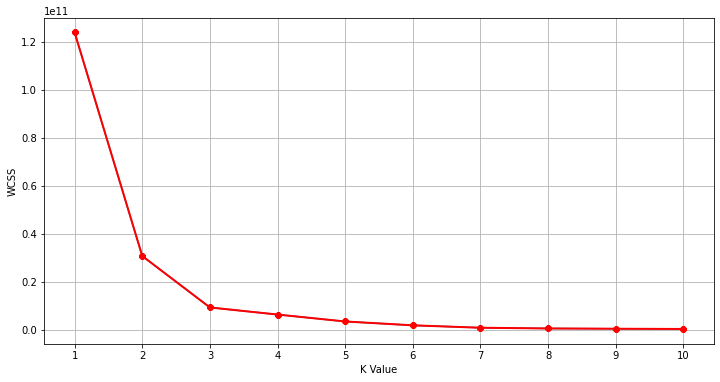

In [117]:
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [118]:
km2 = KMeans(n_clusters=3)
clusters = km2.fit_predict(X)
customer["label"] = clusters

In [119]:
# 3D plot for visualizing customer groups:

Text(0.5, 0, 'amount')

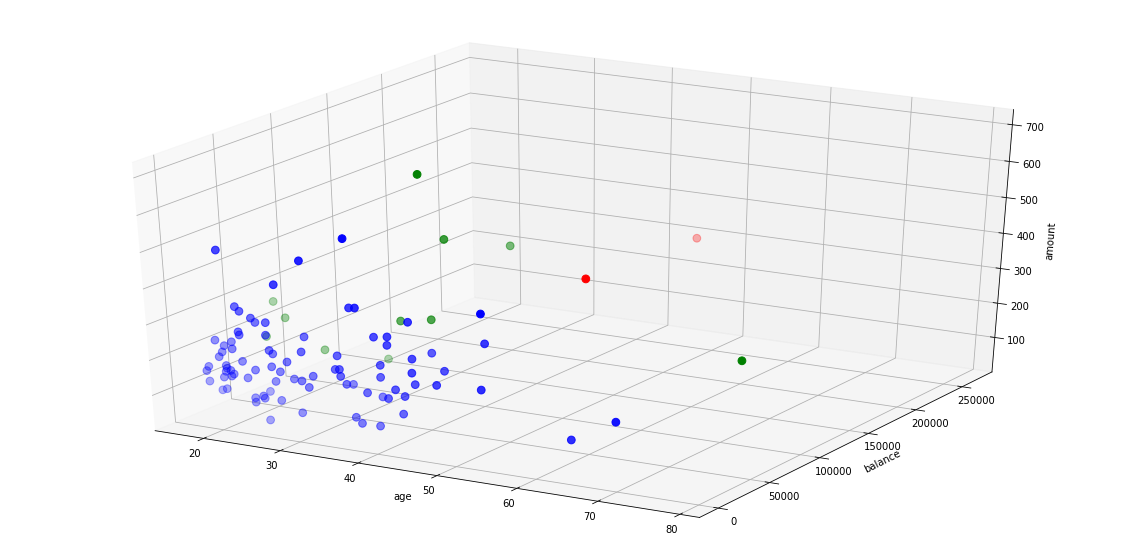

In [120]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(customer.age[customer.label == 0], customer["balance"][customer.label == 0], customer["amount"][customer.label == 0], c='blue', s=60)
ax.scatter(customer.age[customer.label == 1], customer["balance"][customer.label == 1], customer["amount"][customer.label == 1], c='red', s=60)
ax.scatter(customer.age[customer.label == 2], customer["balance"][customer.label == 2], customer["amount"][customer.label == 2], c='green', s=60)
plt.xlabel("age")
plt.ylabel("balance")
ax.set_zlabel('amount')